In [100]:
### 糖尿病数据集
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.linear_model as linear_model
X, y = load_diabetes(return_X_y=True)
print(X.shape, y.shape)
# X = X[:,[2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42, shuffle=False)

regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
print("模型权重:", regressor.coef_)
print("模型偏置:", regressor.intercept_)

y_pred = regressor.predict(X_test)

print("均方差:", mean_squared_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

## 当系数只有1个的时候,可以画图,其他时候不行
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharex=True, sharey=True)
# ax[0].scatter(X_train, y_train)
# ax[0].plot(X_train, regressor.predict(X_train))
# ax[1].scatter(X_test, y_test)
# ax[1].plot(X_test, regressor.predict(X_test))
# plt.show()

(442, 10) (442,)
模型权重: [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]
模型偏置: 152.76429169049118
均方差: 2004.5186863342096
r2_score: 0.585085427447195


In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import (
    GradientBoostingRegressor, ## 梯度提升
    RandomForestRegressor, ## 随机深林
    VotingRegressor ## 投票回归
)
from sklearn.linear_model import LinearRegression ## 线性模型

X, y = load_diabetes(return_X_y=True)
## train classifiers
gbreg = GradientBoostingRegressor(random_state=1)
rfreg = RandomForestRegressor(random_state=1)
lreg = LinearRegression()

gbreg.fit(X, y)
rfreg.fit(X, y)
lreg.fit(X, y)

votreg = VotingRegressor([('gbreg', gbreg), ('rfreg', rfreg), ('lreg', lreg)])
votreg.fit(X, y)


VotingRegressor(estimators=[('gbreg',
                             GradientBoostingRegressor(random_state=1)),
                            ('rfreg', RandomForestRegressor(random_state=1)),
                            ('lreg', LinearRegression())])

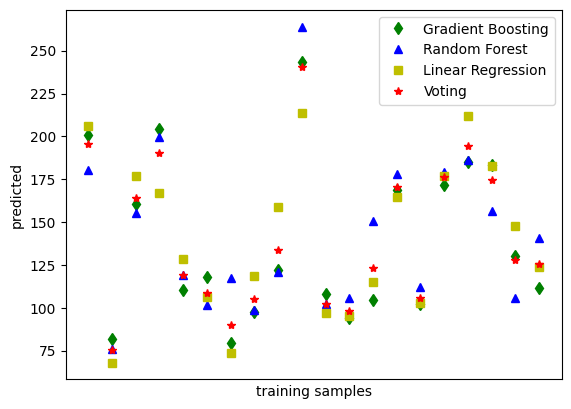

In [37]:
xt = X[:20]
gb_pred = gbreg.predict(xt)
rf_pred = rfreg.predict(xt)
l_pred = lreg.predict(xt)
vot_pred = votreg.predict(xt)

plt.figure()
plt.plot(gb_pred, "gd", label="Gradient Boosting")
plt.plot(rf_pred, "b^", label="Random Forest")
plt.plot(l_pred, "ys", label="Linear Regression")
plt.plot(vot_pred, "r*", label="Voting")

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend()
plt.show()

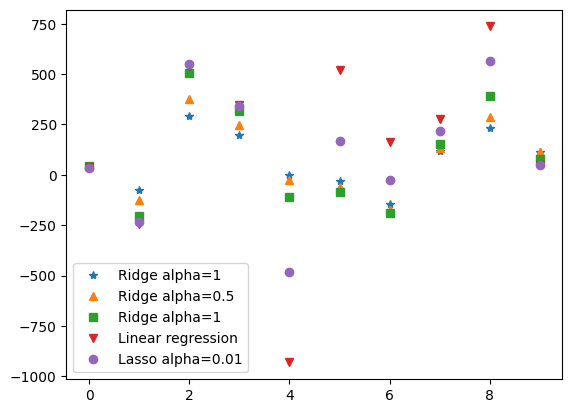

In [45]:
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear = linear_model.LinearRegression()
reg_one = linear_model.Ridge(alpha=1)
reg_half = linear_model.Ridge(alpha=0.5)
reg_small = linear_model.Ridge(alpha=0.1)
reg_lasso = linear_model.Lasso(alpha=0.01, max_iter=100000)
reg_one.fit(X_train, y_train)
reg_half.fit(X_train, y_train)
reg_small.fit(X_train, y_train)
linear.fit(X_train, y_train)
reg_lasso.fit(X_train, y_train)

plt.figure()
plt.plot(reg_one.coef_, '*', label="Ridge alpha=1")
plt.plot(reg_half.coef_, '^', label="Ridge alpha=0.5")
plt.plot(reg_small.coef_, 's', label="Ridge alpha=1")
plt.plot(linear.coef_, 'v', label="Linear regression")
plt.plot(reg_lasso.coef_, 'o', label="Lasso alpha=0.01")
plt.legend()
plt.show()


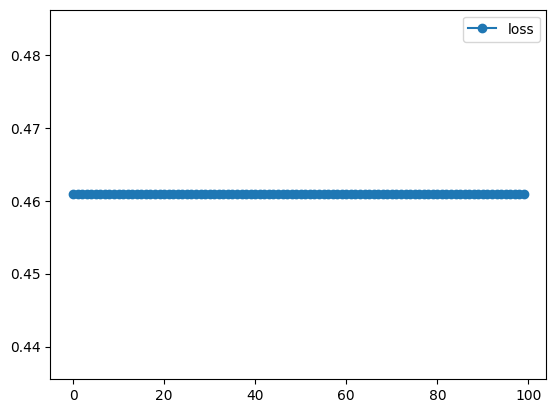

In [46]:
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_cv = linear_model.RidgeCV(alphas=[1, 0.5, 0.1])

losses = []
for _ in range(100):
    ridge_cv.fit(X_train, y_train)
    y_pred = ridge_cv.predict(X_test)
    loss = r2_score(y_test, y_pred)
    losses.append(loss)

plt.figure()
plt.plot(losses, marker='o', label='loss')
plt.legend()
plt.show()


In [47]:
## 数据收集
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
## 监督
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


[219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184.] [131.  44. 197. 303.  51.  87. 233. 100.  51. 107. 111.  65.  97. 273.
  42. 182. 220. 129.  61. 129. 246.  78.  69. 197. 103. 127. 283. 150.
  59. 148. 144.  69. 172. 131. 230. 237.  74.  74. 209.  96.  79.  71.
 124. 124. 170.  75.  42. 127. 134.  78. 182.  72. 144. 179. 292.  52.
 179. 110. 128.  64. 259.  78. 182.  71.  49. 283. 292. 292. 125.  58.
  58. 259. 189.  58.  78.  88. 100.  78. 110. 150. 142. 125. 115.  69.
  79.  45. 152.  77. 109.]


In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
print(y_pred)


[2 0 2 2 2 2 0 2 1 2 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 2 2 1 2 0 2 2 0
 2 2 1 1 1 0 2 0 1 1 1 1 1 1 1 2 1 2 1 1 0 1 1 2 0 1 0 1 0 2 0 1 2 0 2 2 1
 1 2 2 2 0 2 1 1 1 1 1 1 1 1 1]


In [54]:
from sklearn.preprocessing import LabelEncoder

y=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
labelencoder = LabelEncoder()
y_encoder = labelencoder.fit_transform(y)
print(y_encoder)

[0 1 2 3 4 5 6 7 8 9]


In [59]:
### 独热编码
## 按列的方向来计算类别,因为第一类代表同一个特征
## 第一列的值有4种:ABCD, 那么第一列的编码
## A: [1, 0, 0, 0]
## B: [0, 1, 0, 0]
## C: [0, 0, 1, 0]
## D: [0, 0, 0, 1]
## 第二列的有三种:BAD
## A: [1, 0, 0]
## B: [0, 1, 0]
## D: [0, 0, 1]
## ...以此类推,注意虽然都是A的值,但它们的编码可能不一样,要根据种类来编码
from sklearn.preprocessing import OneHotEncoder
y = [['A', 'B', 'C', 'D'], ['B', 'A', 'B', 'A'], ['C', 'D', 'A', 'B'],
     ['D','A', 'C', 'B']]
print(y[0])
print(y[1])
print(y[2])
print(y[3])
encoder = OneHotEncoder(sparse_output=False)
y_encoder = encoder.fit_transform(y)
print(y_encoder)

['A', 'B', 'C', 'D']
['B', 'A', 'B', 'A']
['C', 'D', 'A', 'B']
['D', 'A', 'C', 'B']
[[1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]]


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
## 重要特征
print(clf.feature_importances_)
print(classification_report(y_test, y_pred, zero_division=np.nan))

[0.10817625 0.02871538 0.12077792 0.12038998 0.11184009 0.11234021
 0.10764316 0.0604558  0.11776173 0.11189947]
              precision    recall  f1-score   support

        37.0        nan      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        43.0       0.00       nan      0.00       0.0
        48.0        nan      0.00      0.00       2.0
        49.0       0.00       nan      0.00       0.0
        51.0       0.00       nan      0.00       0.0
        52.0        nan      0.00      0.00       2.0
        53.0       0.00       nan      0.00       0.0
        55.0       0.00       nan      0.00       0.0
        58.0       0.00       nan      0.00       0.0
        59.0       0.00       nan      0.00       0.0
        60.0        nan      0.00      0.00       1.0
        61.0       0.00      0.00      0.00       1.0
        63.0        nan      0.00      0.00       2.0
        64.0        nan      0.00      0.00       1.0
        65.0       0.0

In [61]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=clf, n_features_to_select=3)
### 递归特征消除(Recursive Feature Elimination)
X_rfe = rfe.fit_transform(X_train, y_train)
print(X_rfe)

[[ 0.01211685  0.04941617  0.02736405]
 [-0.01806189  0.01215151  0.00027248]
 [ 0.04984027 -0.016345    0.01703607]
 ...
 [-0.02021751 -0.02949724 -0.01090325]
 [-0.02345095  0.00463594 -0.03845972]
 [ 0.02828403  0.02499059 -0.00514219]]


In [62]:
from sklearn.decomposition import PCA

## 主成分分析
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
print(X_pca)

[[ 1.03801341e-01 -5.27859810e-03]
 [ 4.36645879e-02 -7.18705880e-02]
 [ 2.38996086e-02 -1.10655195e-02]
 [-1.62180317e-01  2.44851790e-03]
 [-1.65749372e-01  3.51293815e-02]
 [-1.71866679e-01  4.77590778e-02]
 [ 1.57084529e-02 -3.44937952e-03]
 [ 1.34455690e-01 -7.05319227e-02]
 [ 5.79907886e-03 -2.63961265e-02]
 [-1.21250857e-01  6.31143392e-02]
 [-8.47107923e-02  6.87002098e-02]
 [ 5.38875302e-02 -4.31146099e-02]
 [-8.03022159e-02 -1.31548695e-01]
 [ 1.05744619e-01 -4.82568620e-02]
 [-1.21826648e-01 -7.66705492e-02]
 [ 4.49430752e-02  5.27528014e-03]
 [-1.90534009e-01 -1.13175126e-02]
 [-1.58349714e-02 -2.02701328e-02]
 [ 1.44529128e-02 -1.71965894e-02]
 [ 6.54451163e-02  1.11848123e-01]
 [-5.94488304e-02 -3.83210230e-02]
 [ 3.12195108e-02 -3.47234817e-02]
 [ 8.23874105e-03  5.56765916e-02]
 [ 8.47663872e-02  3.20107674e-02]
 [ 1.12467869e-01  4.92020041e-02]
 [ 7.25814528e-02 -5.51762172e-02]
 [ 2.85417533e-03  9.78262735e-03]
 [-5.63151818e-02 -2.16015418e-02]
 [-3.55598147e-02 -6

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 线性判别分析
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)
print(X_lda)

[[ 9.13129620e-01 -4.10938031e-01]
 [-5.04604285e-01  2.22239507e+00]
 [ 2.69901541e+00 -1.89749139e+00]
 [-1.25371223e+00 -9.27995406e-01]
 [-2.14350772e+00 -2.84326735e-01]
 [-2.96336742e+00  1.14274013e-01]
 [ 1.25467666e+00 -1.01729079e-01]
 [ 3.06139680e+00  4.51110950e-01]
 [ 7.88715303e-01  1.24979498e+00]
 [-1.32615919e+00 -1.59197795e+00]
 [-2.97190205e+00  6.80631691e-01]
 [ 1.69284655e+00 -9.39132320e-01]
 [-1.43399870e+00  1.67648235e+00]
 [ 4.09668276e+00 -2.54207158e-01]
 [-6.46566333e-01 -9.66841292e-01]
 [-7.79246603e-02  1.73468080e-01]
 [-5.13694411e-01 -1.88099066e+00]
 [-4.99862392e-01 -8.87268163e-01]
 [-7.32951729e-01 -9.23467734e-01]
 [ 1.46195796e-01  3.21460523e-02]
 [ 1.05882239e+00 -1.40546356e+00]
 [-1.53205001e+00  2.68057514e+00]
 [ 1.71378457e+00 -1.63580445e+00]
 [ 1.50985006e+00 -1.35984478e+00]
 [ 1.39464116e+00  8.95734790e-01]
 [ 1.24624729e+00  1.17002427e+00]
 [ 4.03093333e-01  4.93286978e-01]
 [ 3.41353691e-02  3.92330436e-01]
 [-2.70066020e-01 -2

In [64]:
from sklearn.impute import SimpleImputer
## 均值填充
imputer = SimpleImputer(strategy='mean')
X_imputer = imputer.fit_transform(X_train)
print(X_imputer)

[[ 0.07076875  0.05068012  0.01211685 ...  0.03430886  0.02736405
  -0.0010777 ]
 [-0.00914709  0.05068012 -0.01806189 ...  0.07120998  0.00027248
   0.01963284]
 [ 0.00538306 -0.04464164  0.04984027 ... -0.00259226  0.01703607
  -0.01350402]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]]


In [71]:
### 数据不平衡

## 上采样 --- 增加少量样本的数量
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42, k_neighbors=1)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# print(X_resampled.shape, y_resampled.shape)

## 下采样 --- 减少多数样本的数量
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_resampled_1, y_resampled_1 = under_sampler.fit_resample(X_train, y_train)
print(X_resampled_1.shape, y_resampled_1.shape)

(199, 10) (199,)


<Figure size 640x480 with 0 Axes>

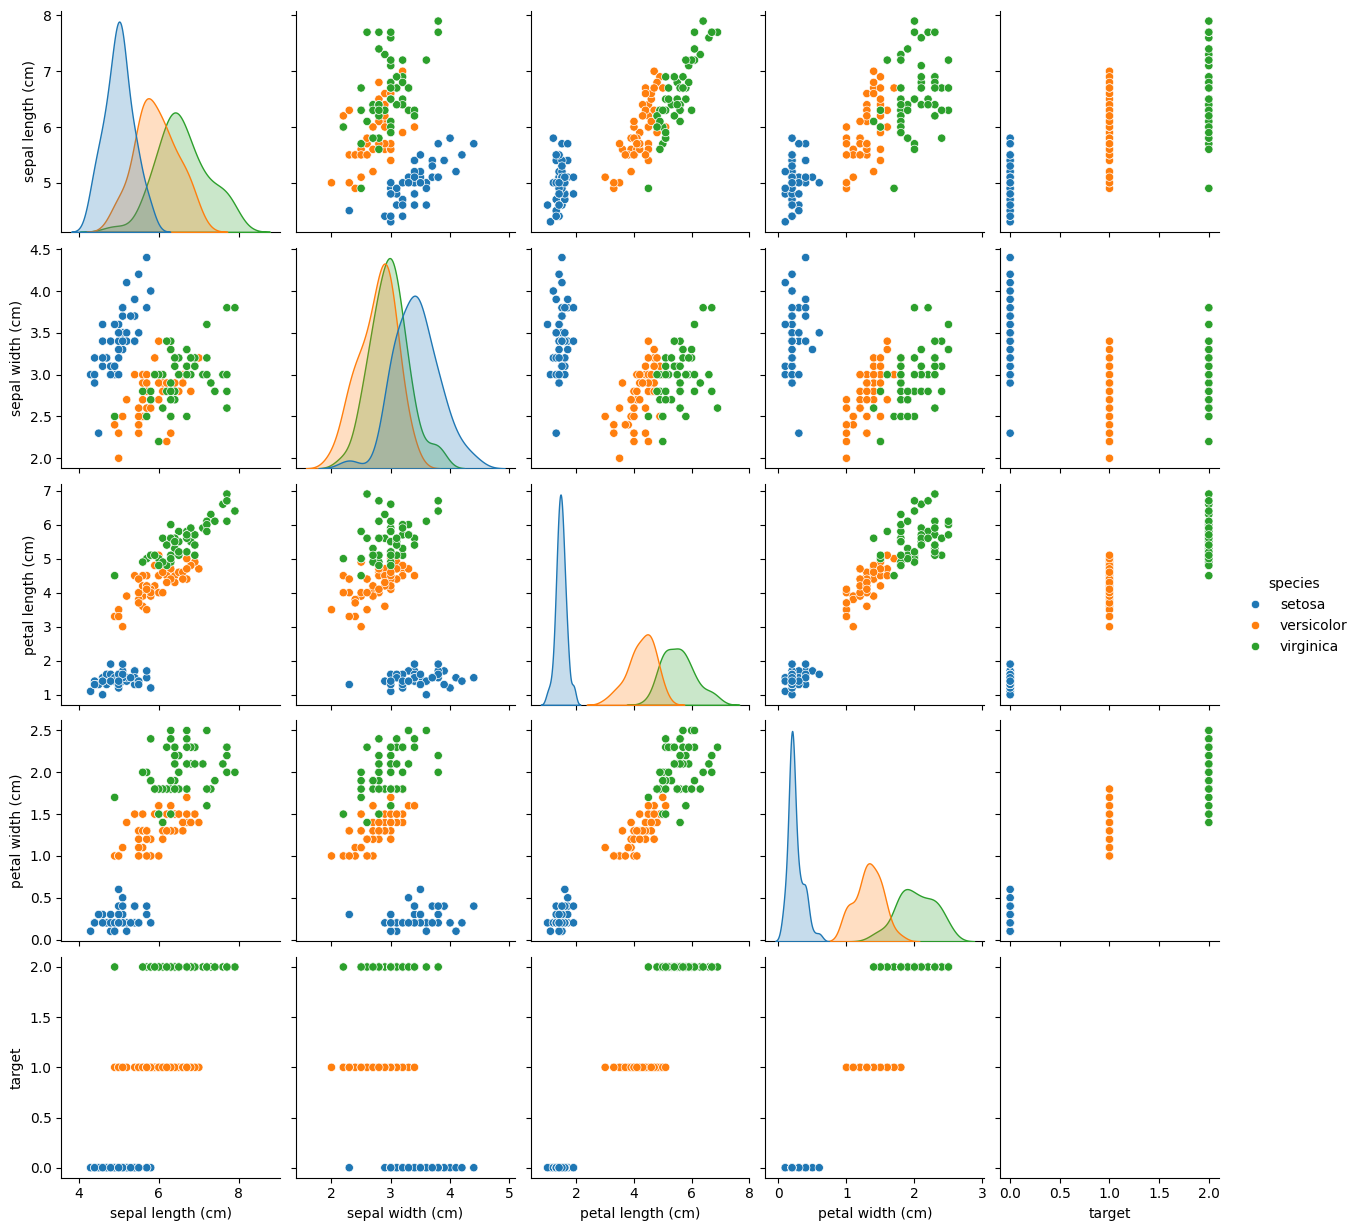

In [79]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = df['target'].apply(lambda x: data.target_names[x])

plt.figure()
sns.pairplot(df, hue='species')
plt.show()

In [82]:
df.head()
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

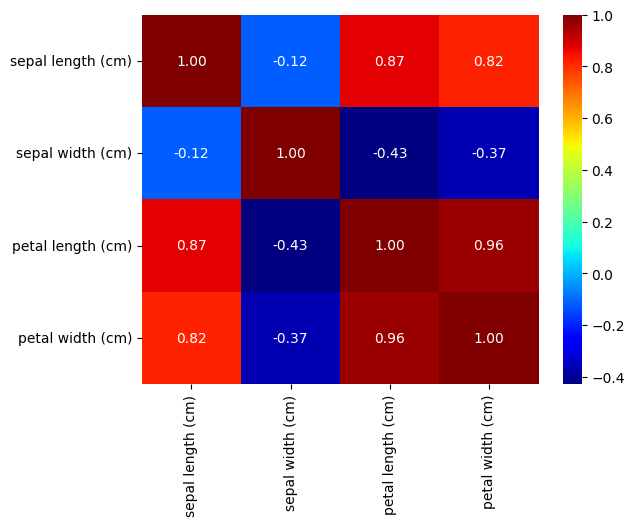

In [85]:
df2 = df.drop(columns=['target', 'species'])
plt.figure()
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='jet', )
plt.show()

In [90]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target', 'species'])
y = df['target']

## 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 选择最相关的2个特征
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)
## 获取选择的特征列对应的bool数组
selected_features = selector.get_support()
X_new, selected_features, X.columns[selected_features]

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.4, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],


数据预览：
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


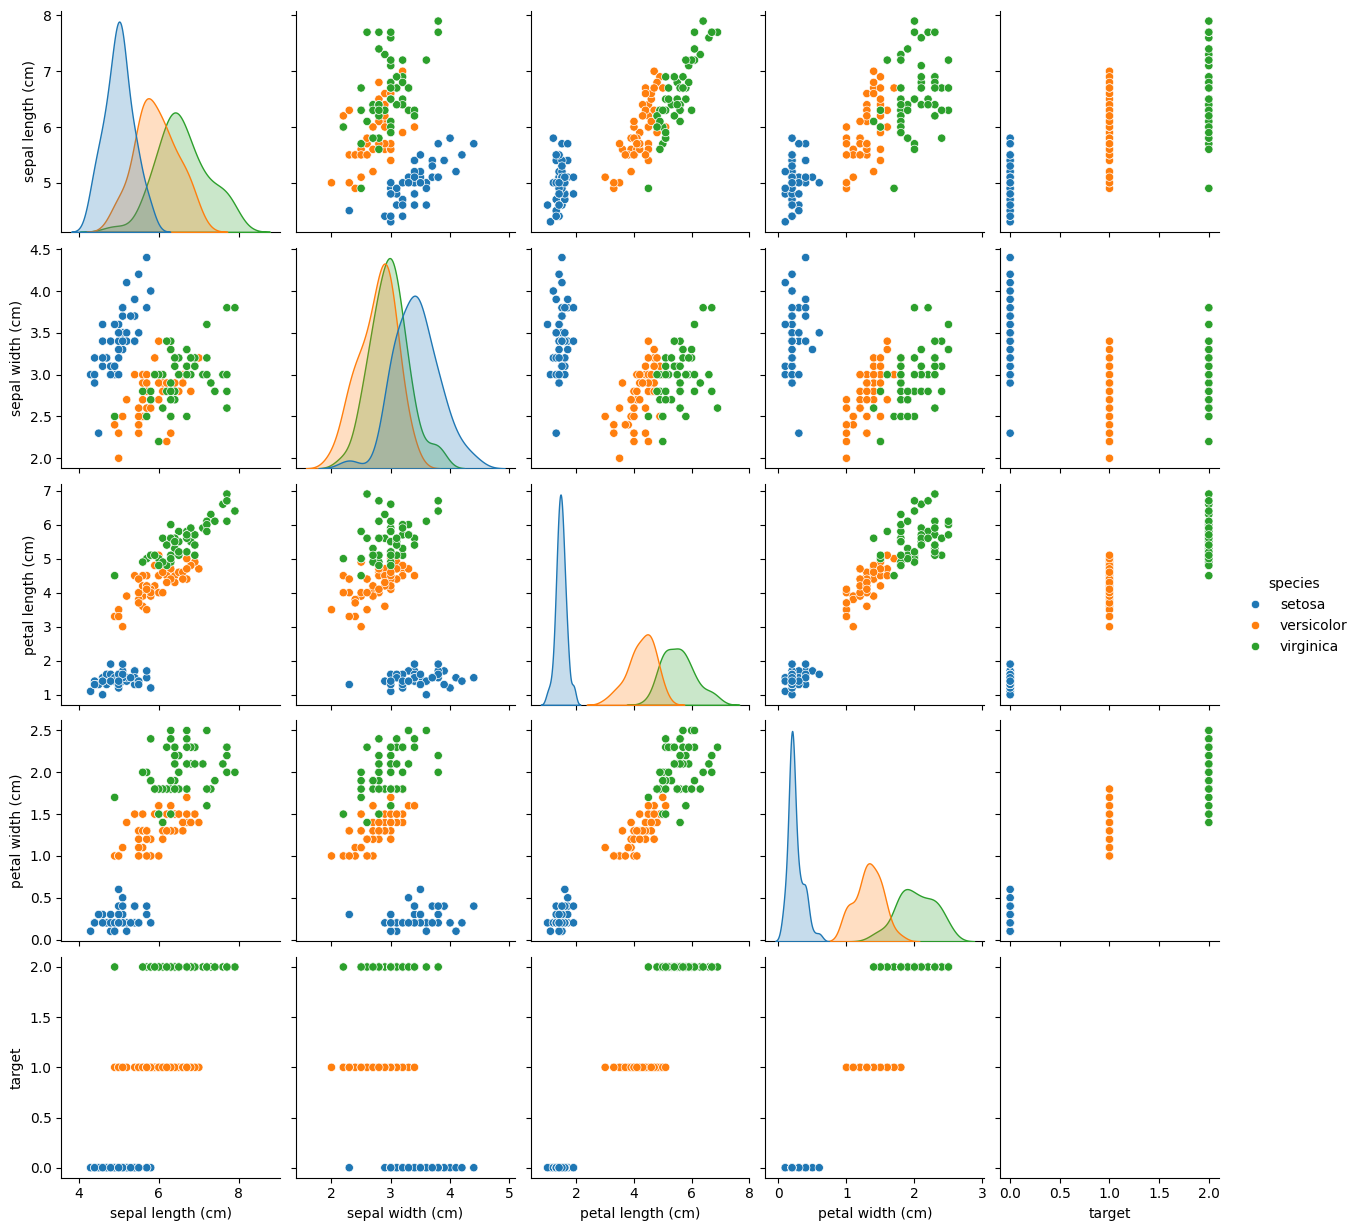

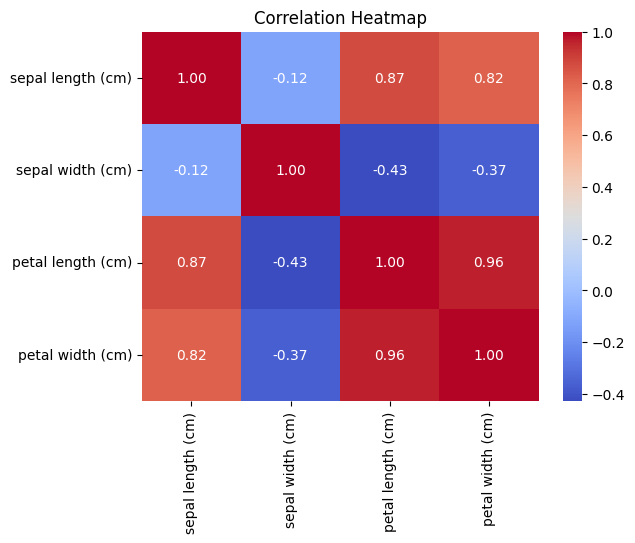

Decision Tree Accuracy: 1.0000
SVM Accuracy: 0.9667

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


SVM Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 

In [91]:
### 整体完整代码
# 导入必要的库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. 数据加载
# 加载鸢尾花数据集
data = load_iris()

# 转换为 DataFrame 方便查看
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = df['target'].apply(lambda x: data.target_names[x])

# 查看前几行数据
print("数据预览：")
print(df.head())

# 2. 数据可视化
# 绘制特征之间的关系
sns.pairplot(df, hue="species")
plt.show()

# 绘制热力图查看特征之间的相关性
correlation_matrix = df.drop(columns=['target', 'species']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. 特征选择与数据预处理
# 提取特征和标签
X = df.drop(columns=['target', 'species'])
y = df['target']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 建立分类模型
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 使用决策树分类器
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# 预测
y_pred_dt = model_dt.predict(X_test)

# 输出决策树的准确率
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# 使用支持向量机（SVM）分类器
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)

# 预测
y_pred_svm = model_svm.predict(X_test)

# 输出SVM的准确率
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# 5. 模型评估
# 决策树模型评估
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# SVM模型评估
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# 6. 网格搜索调优
# 定义决策树的参数网格
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 初始化 GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 获取最佳参数和最佳模型
print("\nBest Parameters from GridSearchCV (Decision Tree):")
print(grid_search.best_params_)

# 使用最佳模型进行预测
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# 输出优化后的决策树准确率
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Decision Tree Accuracy: {accuracy_optimized:.4f}")

# 7. 交叉验证
# 进行 5 折交叉验证
cross_val_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("\nCross-validation Scores (Optimized Decision Tree):")
print(cross_val_scores)
print(f"Mean CV Accuracy: {cross_val_scores.mean():.4f}")

In [92]:
### 房价预测例子

## 数据生成
import pandas as pd
import numpy as np

# 模拟数据：房屋面积 (平方米)、房间数、楼层、建造年份、位置（类别变量）
data = {
    'area': [70, 85, 100, 120, 60, 150, 200, 80, 95, 110],
    'rooms': [2, 3, 3, 4, 2, 5, 6, 3, 3, 4],
    'floor': [5, 2, 8, 10, 3, 15, 18, 7, 9, 11],
    'year_built': [2005, 2010, 2012, 2015, 2000, 2018, 2020, 2008, 2011, 2016],
    'location': ['Chaoyang', 'Haidian', 'Chaoyang', 'Dongcheng', 'Fengtai', 'Haidian', 'Chaoyang', 'Fengtai', 'Dongcheng', 'Haidian'],
    'price': [5000000, 6000000, 6500000, 7000000, 4500000, 10000000, 12000000, 5500000, 6200000, 7500000]  # 房价（目标变量）
}

# 创建 DataFrame
df = pd.DataFrame(data)

# 查看数据
print("数据预览：")
print(df.head())

数据预览：
   area  rooms  floor  year_built   location    price
0    70      2      5        2005   Chaoyang  5000000
1    85      3      2        2010    Haidian  6000000
2   100      3      8        2012   Chaoyang  6500000
3   120      4     10        2015  Dongcheng  7000000
4    60      2      3        2000    Fengtai  4500000


In [93]:
### 数据处理 -- 标准化、独热编码转换
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 特征选择
X = df[['area', 'rooms', 'floor', 'year_built', 'location']]  # 特征
y = df['price']  # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建预处理步骤
numeric_features = ['area', 'rooms', 'floor', 'year_built']
categorical_features = ['location']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # 数值特征标准化
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 处理测试集中的新类别
])

# 组合成 ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 查看数据预处理后的结构
X_train_transformed = preprocessor.fit_transform(X_train)
print("预处理后的训练数据：")
print(X_train_transformed)

预处理后的训练数据：
[[ 0.89826776  1.0440738   1.14636101  0.96800387  0.          0.
   0.          1.        ]
 [-0.95622052 -1.23390539 -0.98640366 -1.04544418  1.          0.
   0.          0.        ]
 [-0.72440948 -0.474579   -0.55985073 -0.58080232  0.          0.
   1.          0.        ]
 [-0.26078741 -0.474579   -0.34657426  0.03872015  1.          0.
   0.          0.        ]
 [-0.02897638  0.2847474   0.29325514  0.65824263  0.          0.
   0.          1.        ]
 [-1.18803155 -1.23390539 -1.4129566  -1.81984727  0.          0.
   1.          0.        ]
 [ 0.20283466  0.2847474   0.07997868  0.50336201  0.          1.
   0.          0.        ]
 [ 2.05732294  1.80340019  1.78619041  1.2777651   1.          0.
   0.          0.        ]]


In [94]:
## 模型建立 拟合

from sklearn.linear_model import LinearRegression

# 构建一个包含预处理和回归模型的 Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # 数据预处理步骤
    ('regressor', LinearRegression())  # 回归模型
])

# 训练模型
model_pipeline.fit(X_train, y_train)

# 进行预测
y_pred = model_pipeline.predict(X_test)

# 输出预测结果
print("\n预测结果：")
print(y_pred)


预测结果：
[6375000.         4874999.99999999]


In [95]:
## 模型评估
from sklearn.metrics import mean_squared_error, r2_score

# 计算均方误差（MSE）和决定系数（R²）
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出评估结果
print("\n模型评估：")
print(f"均方误差 (MSE): {mse:.2f}")
print(f"决定系数 (R²): {r2:.2f}")


模型评估：
均方误差 (MSE): 648125000000.01
决定系数 (R²): -63.81


In [96]:
## 模型优化 -- 网格搜索

from sklearn.model_selection import GridSearchCV

# 5. 模型优化：使用网格搜索调整超参数
# 对线性回归的超参数进行调优（仅调整 'fit_intercept'）
param_grid = {
    'regressor__fit_intercept': [True, False],  # 是否拟合截距
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# 输出最佳参数和结果
print("\n最佳参数：")
print(grid_search.best_params_)

# 使用最佳模型进行预测
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# 输出优化后的评估结果
mse_opt = mean_squared_error(y_test, y_pred_optimized)
r2_opt = r2_score(y_test, y_pred_optimized)

print("\n优化后的模型评估：")
print(f"均方误差 (MSE): {mse_opt:.2f}")
print(f"决定系数 (R²): {r2_opt:.2f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits

最佳参数：
{'regressor__fit_intercept': True}

优化后的模型评估：
均方误差 (MSE): 648125000000.01
决定系数 (R²): -63.81


## 混淆矩阵

### 什么是混淆矩阵？
混淆矩阵（Confusion Matrix）是一个用于评估分类模型性能的工具，尤其在监督学习中非常常见。它以表格形式展示模型预测结果与真实标签之间的关系，帮助你直观地看到模型在每个类别上的表现。

#### 二分类混淆矩阵
对于二分类问题（例如类别 0 和 1），混淆矩阵是一个 2x2 的表格：

|                | 预测正类 (1) | 预测负类 (0) |
|----------------|--------------|--------------|
| **真实正类 (1)** | TP (真阳性)  | FN (假阴性)  |
| **真实负类 (0)** | FP (假阳性)  | TN (真阴性)  |

- **TP (True Positive)**：真实为正类，预测也为正类。
- **TN (True Negative)**：真实为负类，预测也为负类。
- **FP (False Positive)**：真实为负类，但预测为正类（误报）。
- **FN (False Negative)**：真实为正类，但预测为负类（漏报）。

#### 多分类混淆矩阵
对于多分类问题，混淆矩阵是一个 NxN 的表格（N 是类别数），对角线表示每个类别正确预测的样本数，非对角线表示错误预测的样本数。

### 混淆矩阵的作用
1. **评估模型性能**：
   - 计算准确率：`(TP + TN) / (TP + TN + FP + FN)`。
   - 计算精确率（Precision）：`TP / (TP + FP)`。
   - 计算召回率（Recall）：`TP / (TP + FN)`。
   - 计算 F1 分数：`2 * (Precision * Recall) / (Precision + Recall)`。
2. **发现模型偏见**：例如，模型是否倾向于预测多数类。
3. **分析不平衡数据**：结合你之前的 SMOTE 和 RandomUnderSampler，混淆矩阵可以帮助你评估处理不平衡数据后的效果。

### 在你的上下文中使用混淆矩阵
从你之前的代码来看，你在处理不平衡数据集（用 SMOTE 上采样和 RandomUnderSampler 下采样），然后可能用 KNN 或其他分类器训练模型。假设你已经训练了一个模型，现在想用混淆矩阵来评估它，我们可以这样做：

#### 示例代码
以下是一个完整的示例，基于你之前的代码背景，展示如何生成和解读混淆矩阵：

```python
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from collections import Counter

# 假设 dataset 是你的数据集
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=3)
print("原始训练集类别分布:", Counter(y_train))


# 训练模型（以 KNN 为例）
knn = KNeighborsClassifier(n_neighbors=min(5, len(X_train)))  # 动态调整 n_neighbors
knn.fit(X_train, y_train)  # 使用 SMOTE 后的数据训练

# 预测测试集
y_pred = knn.predict(X_test)

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("混淆矩阵:\n", cm)

# 打印分类报告（包含精确率、召回率、F1 分数等）
print("\n分类报告:\n", classification_report(y_test, y_pred))
```

#### 输出解读
假设你的 `y_test` 和 `y_pred` 是二分类问题，混淆矩阵可能是这样的：
```
混淆矩阵:
[[50  5]  # 真实负类 (0)
 [10 35]] # 真实正类 (1)
```
- **解读**：
  - `TN = 50`：50 个负类样本被正确预测为负类。
  - `FP = 5`：5 个负类样本被错误预测为正类。
  - `FN = 10`：10 个正类样本被错误预测为负类。
  - `TP = 35`：35 个正类样本被正确预测为正类。

`classification_report` 会进一步提供：
```
              precision    recall  f1-score   support
       0       0.83      0.91      0.87        55
       1       0.88      0.78      0.82        45
accuracy                           0.85       100
```
- **精确率 (Precision)**：预测为正类的样本中，真正为正类的比例。
- **召回率 (Recall)**：真实正类中被正确预测的比例。
- **F1 分数**：精确率和召回率的调和平均数。
- **准确率 (Accuracy)**：整体正确预测的比例。

### 可视化混淆矩阵
为了更直观地展示混淆矩阵，可以用 `seaborn` 绘制热力图：
```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['负类', '正类'], yticklabels=['负类', '正类'])
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵')
plt.show()
```

### 1. F1 分数
#### 定义
F1 分数是精确率（Precision）和召回率（Recall）的调和平均数，用于评估分类模型在特定阈值下的性能：
\[ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \]
- **精确率 (Precision)** = \(\frac{TP}{TP + FP}\)，预测为正类的样本中正确预测的比例。
- **召回率 (Recall)** = \(\frac{TP}{TP + FN}\)，真实正类中被正确预测的比例。
- **TP**：真阳性，**FP**：假阳性，**FN**：假阴性。

#### 作用
- F1 分数平衡了精确率和召回率，特别适合不平衡数据集或需要关注正类（例如少数类）的场景。
- 依赖于混淆矩阵，因此与分类阈值（通常默认 0.5）相关。

#### 示例
假设一个二分类模型的混淆矩阵为：
```
[[90 10]  # 负类 (0)
 [20 80]] # 正类 (1)
```
- 正类 (1)：
  - \( TP = 80 \), \( FP = 10 \), \( FN = 20 \)
  - \( \text{Precision} = \frac{80}{80 + 10} = 0.89 \)
  - \( \text{Recall} = \frac{80}{80 + 20} = 0.80 \)
  - \( F1 = 2 \times \frac{0.89 \times 0.80}{0.89 + 0.80} = 2 \times \frac{0.712}{1.69} \approx 0.84 \)

---

### 2. ROC 曲线
#### 定义
ROC 曲线（接收者操作特征曲线）展示模型在不同分类阈值下的表现：
- **横轴**：假阳性率 (FPR) = \(\frac{FP}{FP + TN}\)。
- **纵轴**：真阳性率 (TPR, 即召回率) = \(\frac{TP}{TP + FN}\)。
- 通过调整阈值（0 到 1），绘制 TPR 对 FPR 的曲线。

#### 作用
- 评估模型区分正负类的能力，不依赖单一阈值。
- 对类别分布不敏感，适合比较不同模型的整体性能。

#### 示例
假设模型输出的正类概率和真实标签如下：
- 概率：[0.9, 0.7, 0.6, 0.4, 0.2]
- 真实标签：[1, 1, 0, 0, 1]
- 改变阈值，计算不同 FPR 和 TPR，绘制曲线。

---

### 3. AUC
#### 定义
AUC（曲线下面积）是 ROC 曲线下的面积，取值 0 到 1：
- AUC = 1：完美分类。
- AUC = 0.5：随机猜测。
- AUC < 0.5：分类器比随机还差。

#### 作用
- AUC 量化了 ROC 曲线的性能，是一个综合指标。
- 值越高，模型区分能力越强。

#### 示例
如果 ROC 曲线接近左上角，AUC 可能接近 1；如果接近对角线，AUC 约为 0.5。

---

### 独立代码示例
以下是一个通用的例子，使用 scikit-learn 生成 F1 分数、ROC 曲线和 AUC：

```python
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# 生成模拟二分类数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练逻辑回归模型
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)  # 用于 F1 和混淆矩阵
y_prob = model.predict_proba(X_test)[:, 1]  # 用于 ROC 和 AUC

# 1. 混淆矩阵和 F1 分数
cm = confusion_matrix(y_test, y_pred)
print("混淆矩阵:\n", cm)
print("\n分类报告（包含 F1 分数）:\n", classification_report(y_test, y_pred))

# 2. 计算 ROC 曲线和 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# 3. 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC 曲线 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='随机猜测')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率 (FPR)')
plt.ylabel('真阳性率 (TPR)')
plt.title('ROC 曲线')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
```

---

### 输出解读
#### 混淆矩阵和 F1 分数
可能的输出：
```
混淆矩阵:
[[130  15]
 [ 20 135]]

分类报告:
              precision    recall  f1-score   support
       0       0.87      0.90      0.88       145
       1       0.90      0.87      0.89       155
accuracy                           0.88       300
```
- 类别 1 的 F1 分数为 0.89，表明模型在正类上的表现良好。

#### AUC
```
AUC: 0.93
```
- AUC = 0.93 表示模型整体区分能力很强。

#### ROC 曲线
- 图中蓝色曲线接近左上角，AUC 高于 0.5，优于随机猜测（灰色虚线）。

---

### 三者对比
| 指标       | 依赖阈值 | 适用场景                 | 优点                     | 缺点                   |
|------------|----------|--------------------------|--------------------------|------------------------|
| **F1 分数** | 是       | 不平衡数据，关注正类     | 平衡精确率和召回率       | 只反映单一阈值表现     |
| **ROC 曲线** | 否       | 比较模型整体性能         | 直观展示所有阈值表现     | 对不平衡数据解释需谨慎 |
| **AUC**     | 否       | 评估区分能力             | 单值总结，便于比较       | 不反映具体类别表现     |

---

如果你有具体问题（比如想深入某个指标、调整代码或解释某个结果），请告诉我，我会进一步帮你解答！